# Data of a complex model with induced magnetization

This notebook generates a toal field anomaly (TFA) and an amplitude of the anomalous magnetic field (AMF) data from a complex model in a regular grid or flightlines.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os

from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from fatiando.gravmag import polyprism
from fatiando.vis import mpl

### Auxiliary functions

In [30]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

### The model

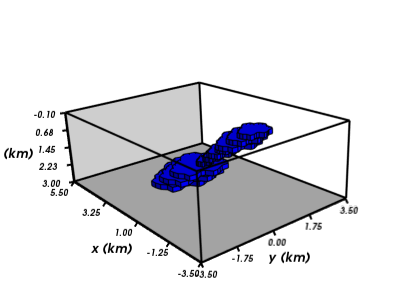

In [31]:
img(filename='complex_data/complex_true.png')

### Importing model and grid

In [32]:
model = 'complex_data/complex_model.pickle'
#grid = '../grids/flightlines_grid_1300pts_16km2.pickle'
grid = '../grids/regular_grid_50x50_100km2.pickle'

In [33]:
with open(model) as w:
        complex_model = pickle.load(w)
with open(grid) as w:
        regular_grid = pickle.load(w)

In [34]:
complex_data = dict()

In [35]:
if grid[9:20] == 'flightlines':
    complex_data['grid'] = [regular_grid['x'], regular_grid['y'],
                            regular_grid['z'], regular_grid['N'],
                            'flightlines']
    mypath = 'complex_data/'+grid[9:38]
    if not os.path.isdir(mypath):
       os.makedirs(mypath)
else:
    complex_data['grid'] = [regular_grid['x'], regular_grid['y'],
                            regular_grid['z'], regular_grid['N'],
                            'regular']
    mypath = 'complex_data/'+grid[9:33]
    if not os.path.isdir(mypath):
       os.makedirs(mypath)

### Generating data

In [36]:
# main field
complex_data['main_field'] = [-21.5, -18.7]

# TFA data
complex_data['tfa'] = polyprism.tf(regular_grid['x'], regular_grid['y'], regular_grid['z'], \
                           complex_model['prisms'], complex_data['main_field'][0], complex_data['main_field'][1]) # predict data

amp_noise = 1.
complex_data['tfa_obs'] = complex_data['tfa'] + np.random.normal(loc=0., scale=amp_noise,
                               size=regular_grid['N']) # noise corrupted tfa data

In [37]:
# AMF data
complex_data['bx'] = polyprism.bx(regular_grid['x'], regular_grid['y'], regular_grid['z'], complex_model['prisms'])
complex_data['by'] = polyprism.by(regular_grid['x'], regular_grid['y'], regular_grid['z'], complex_model['prisms'])
complex_data['bz'] = polyprism.bz(regular_grid['x'], regular_grid['y'], regular_grid['z'], complex_model['prisms'])

complex_data['amf'] = np.sqrt(complex_data['bx']**2. + complex_data['by']**2. + complex_data['bz']**2.)

complex_data['amf_obs'] = complex_data['amf'] + np.random.normal(loc=0., scale=amp_noise,
                               size=regular_grid['N']) # noise corrupted amf data

### Data ploting

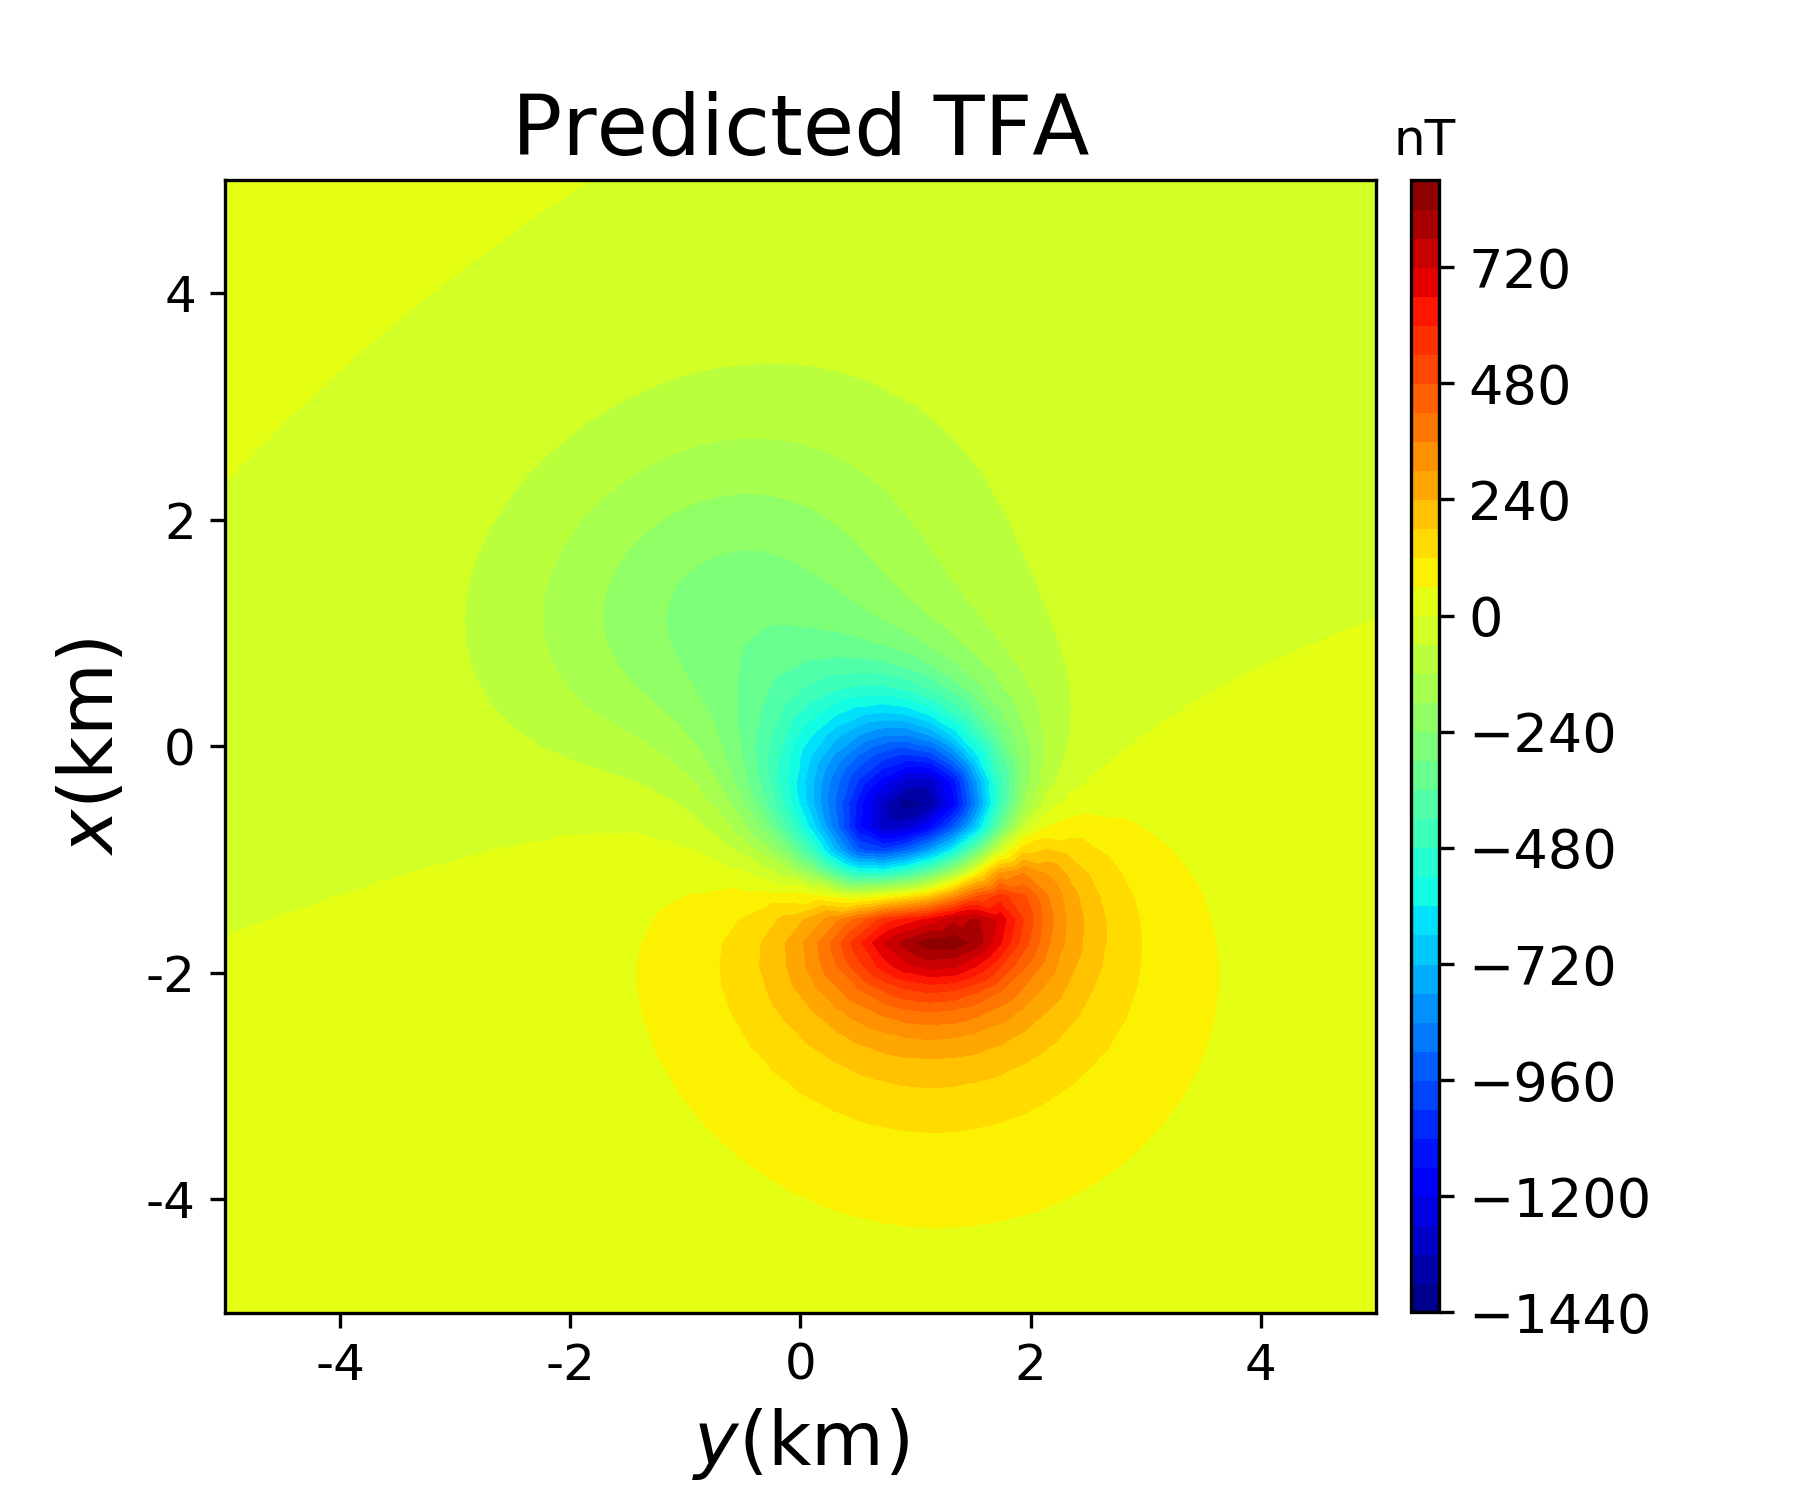

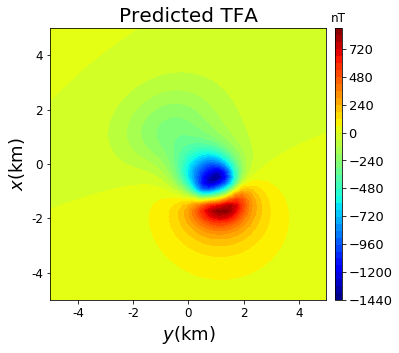

In [38]:
plt.figure(figsize=(6,5))
plt.title('Predicted TFA', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['tfa'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'/pre_tfa.png', dpi=300)
img(filename=mypath+'/pre_tfa.png')

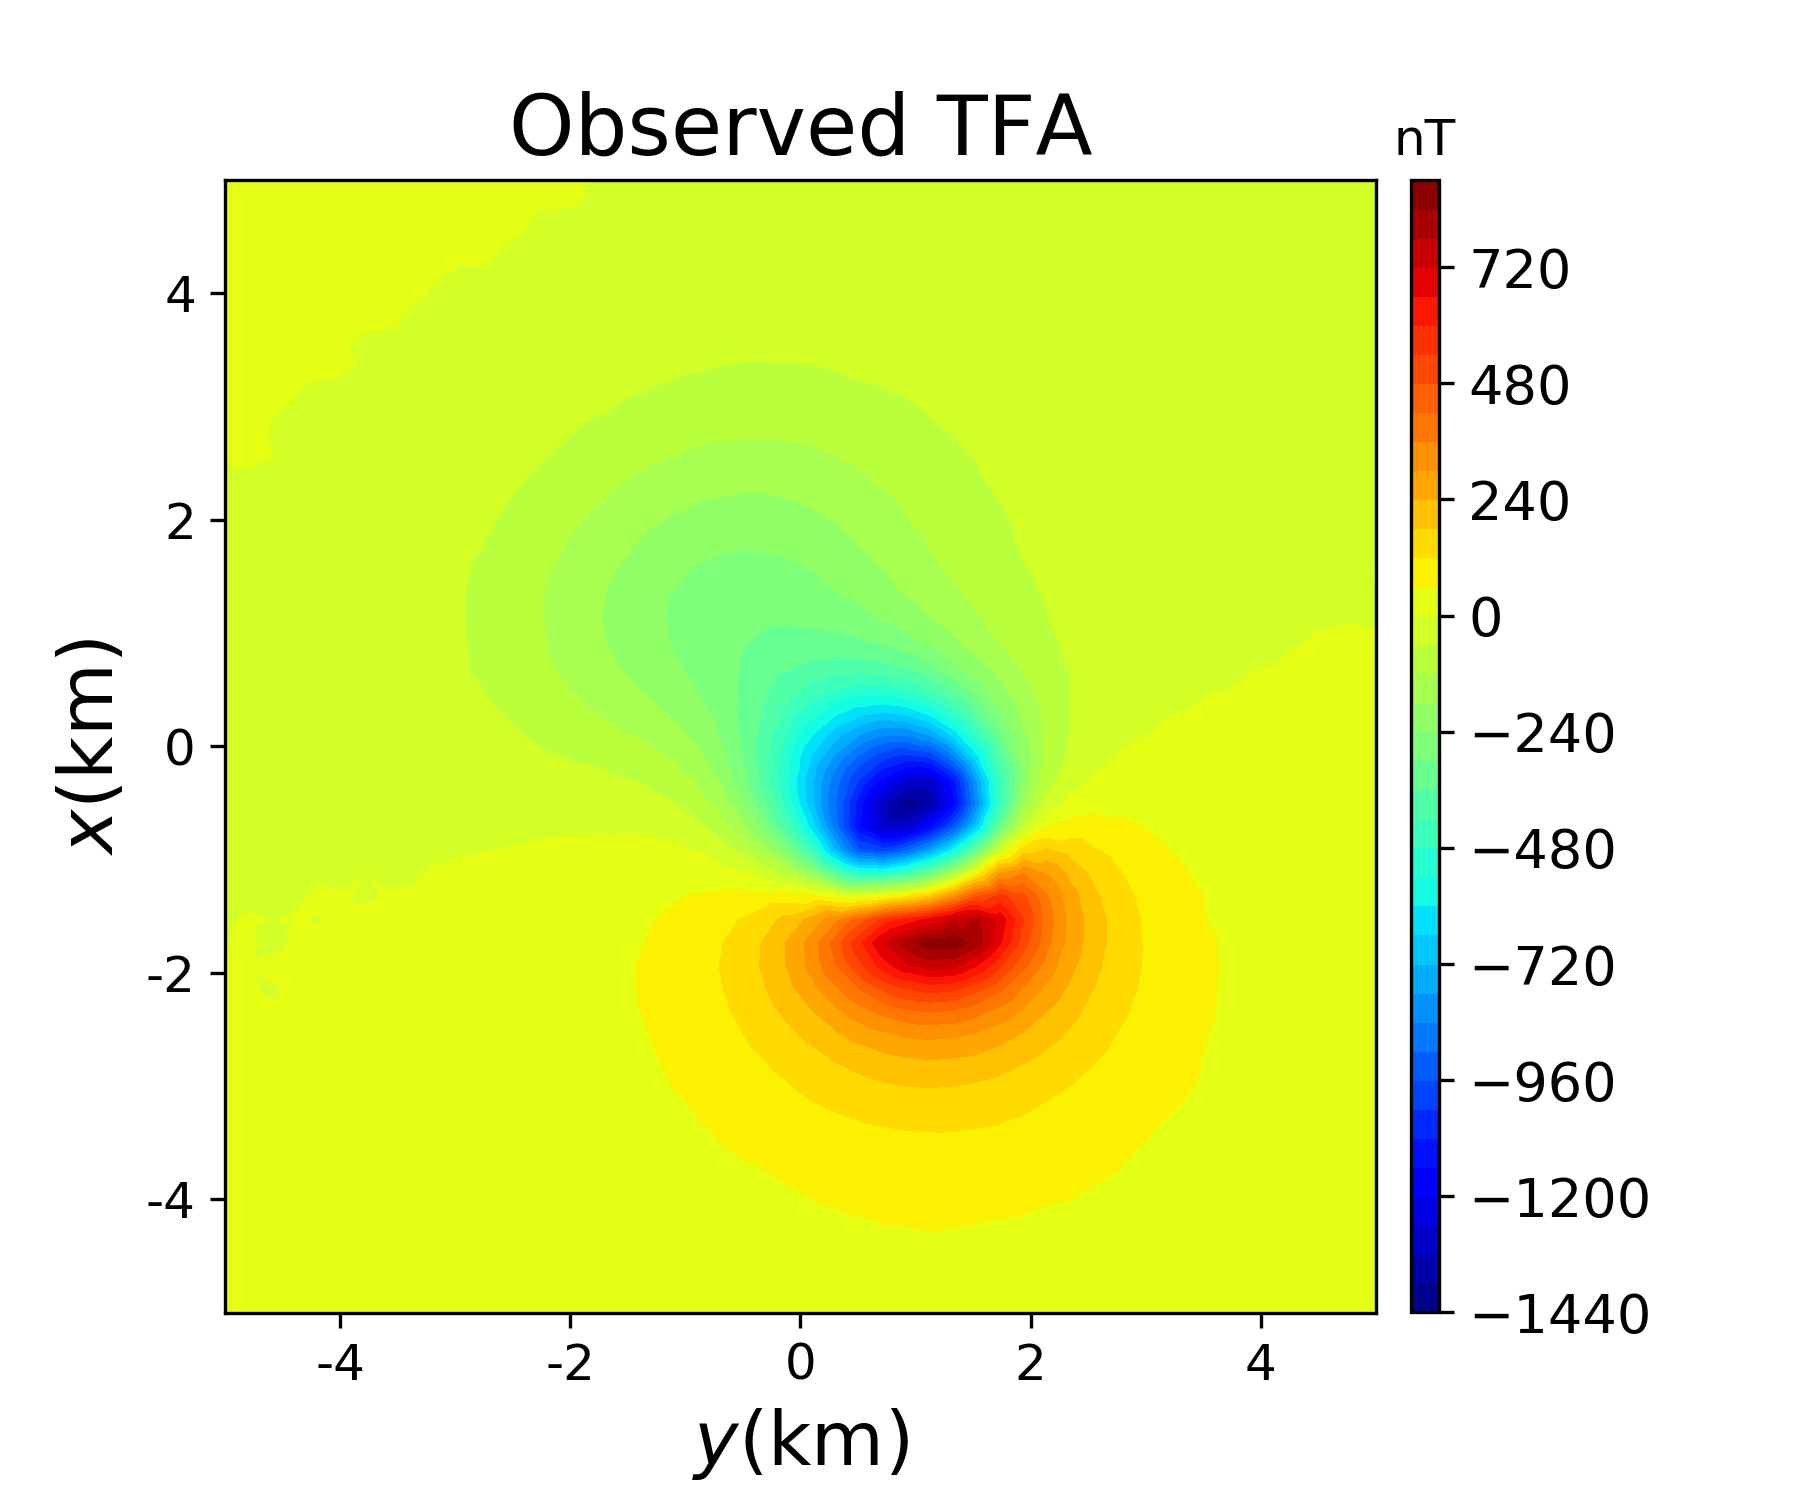

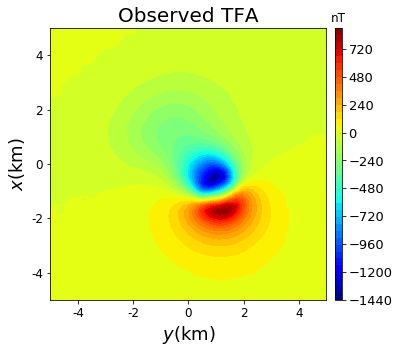

In [39]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['tfa_obs'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'/obs_tfa.png', dpi=300)
img(filename=mypath+'/obs_tfa.png')

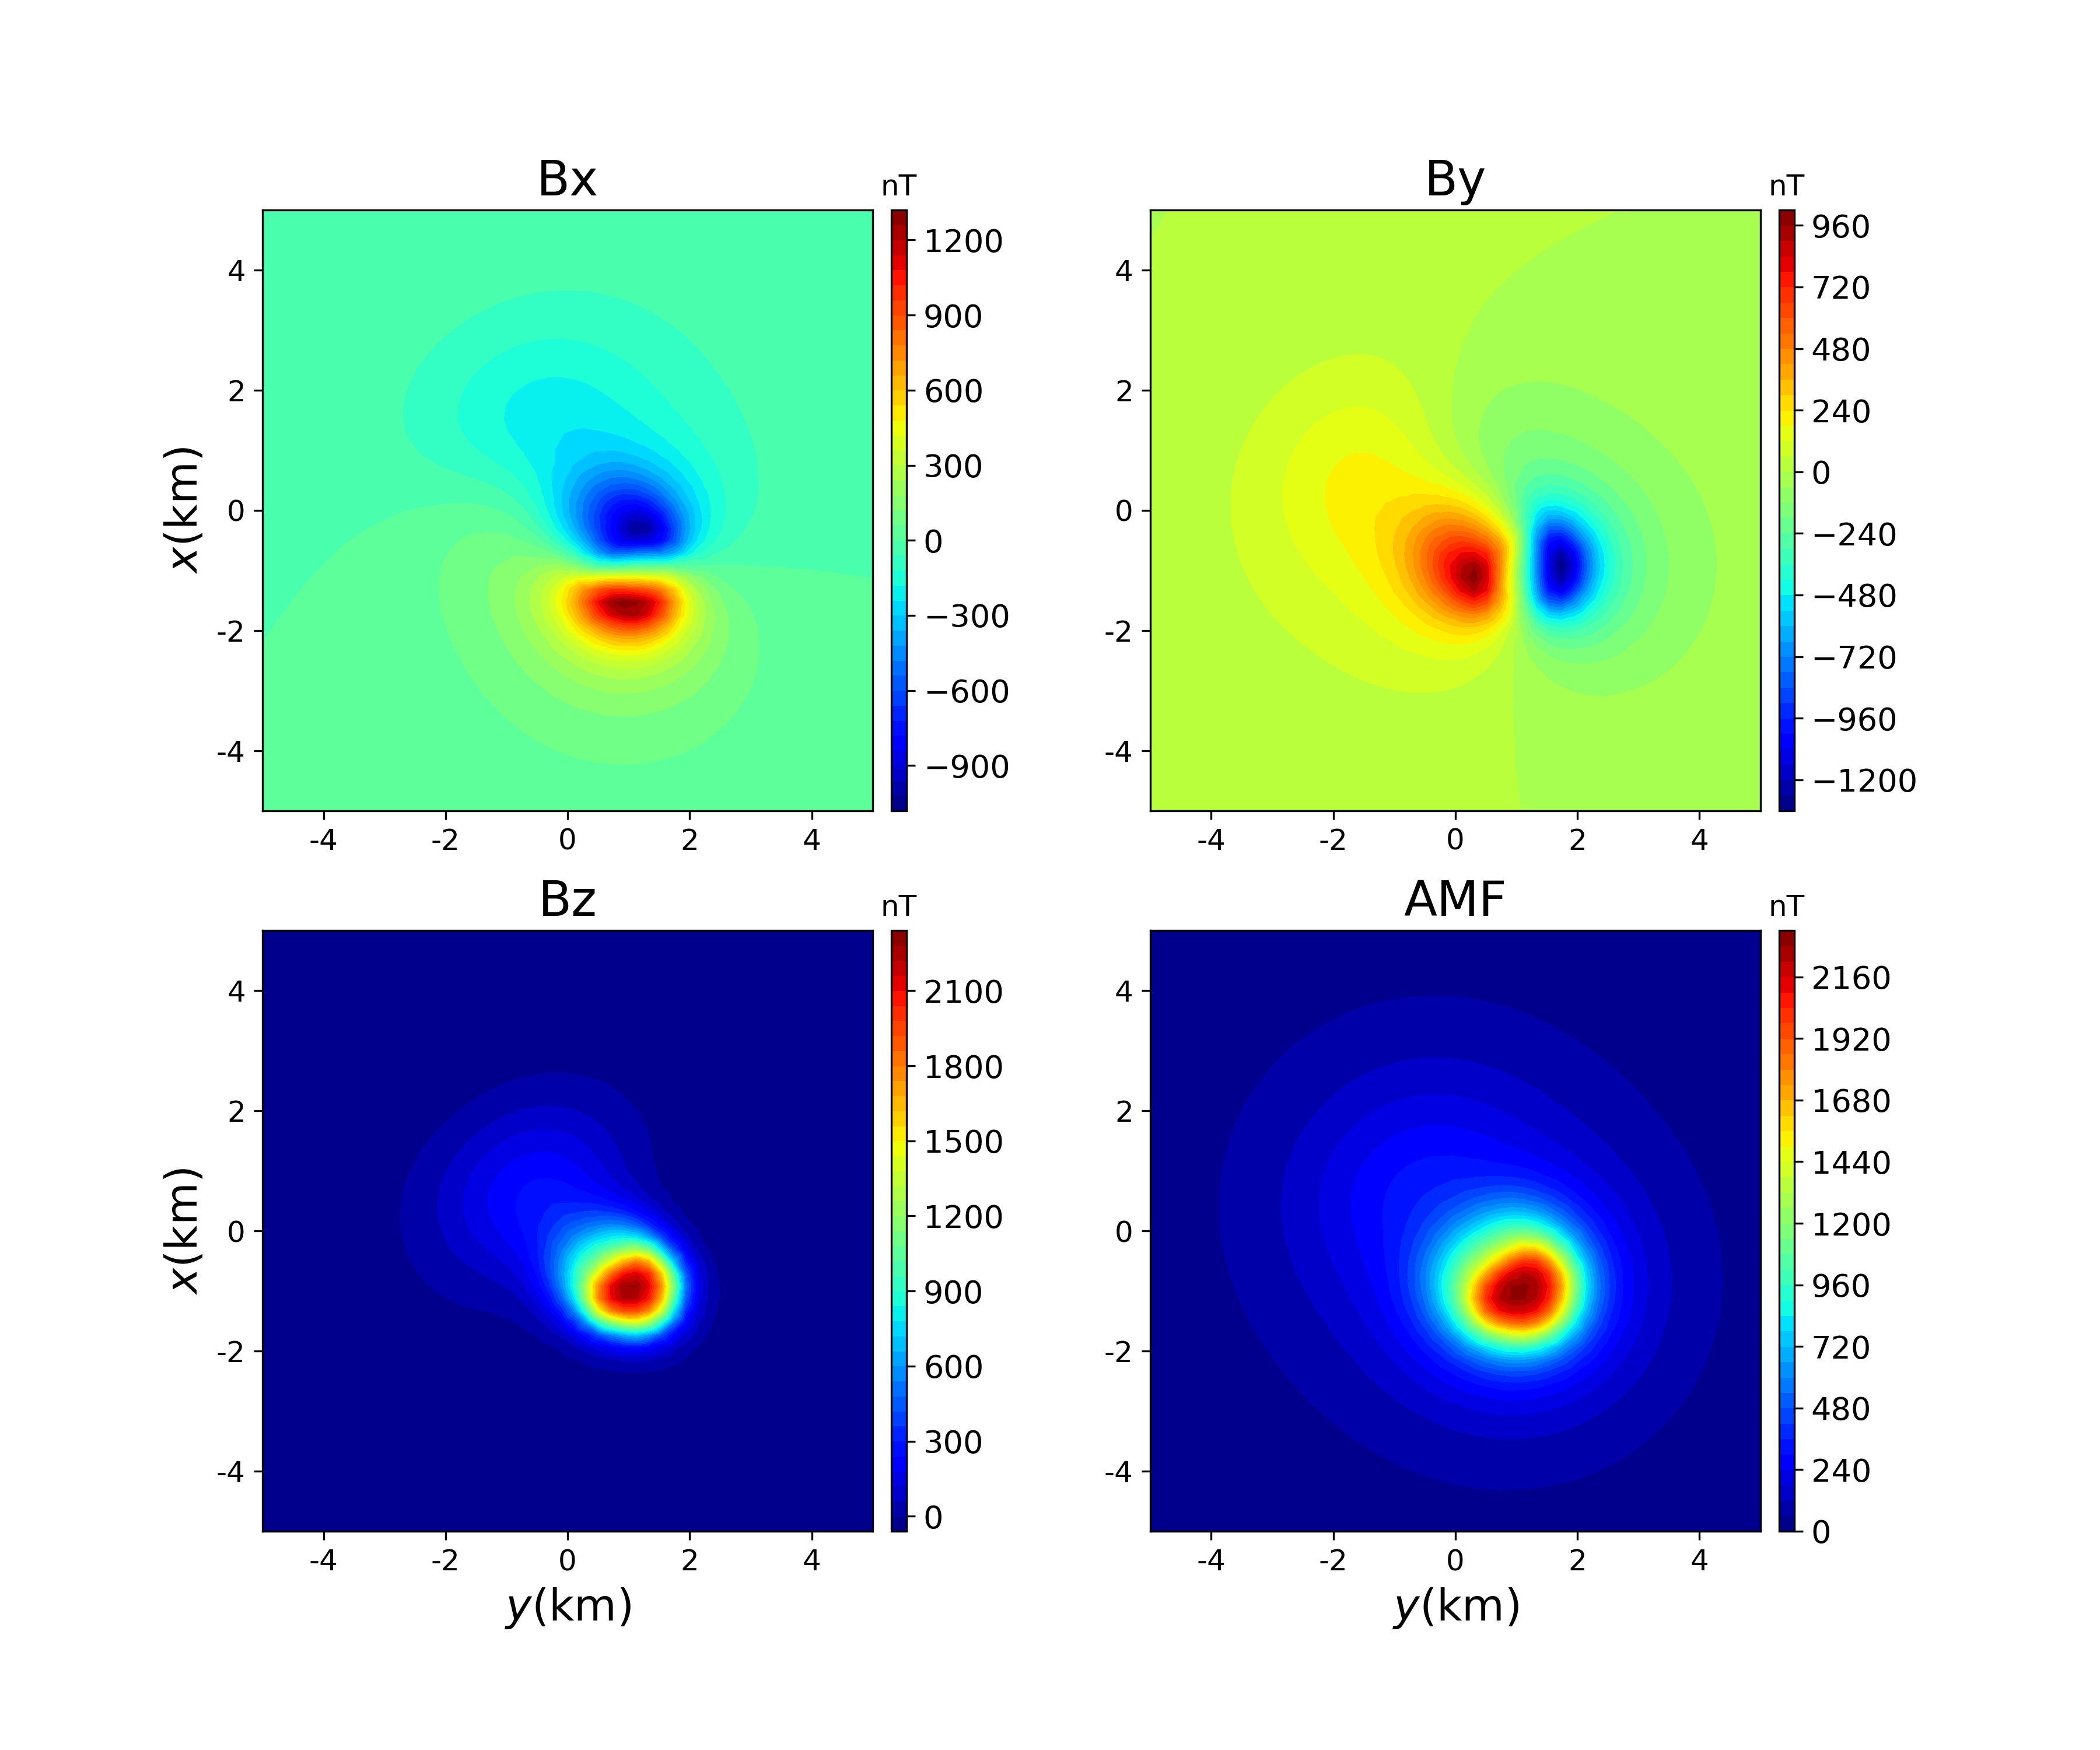

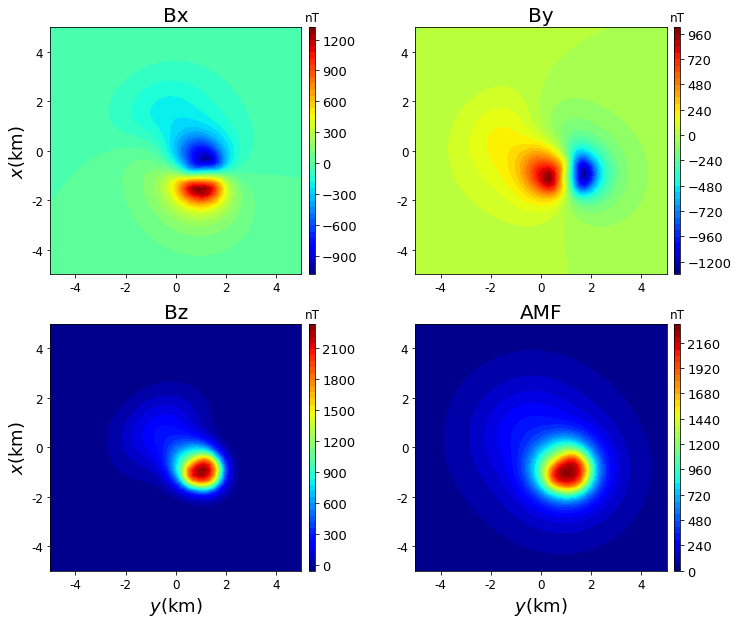

In [40]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title('Bx', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['bx'], 40, cmap='jet').ax.tick_params(labelsize=12)
#plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.subplot(2,2,2)
plt.title('By', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['by'], 40, cmap='jet').ax.tick_params(labelsize=12)
#plt.xlabel('$y$(km)', fontsize=18)
#plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.subplot(2,2,3)
plt.title('Bz', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['bz'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.subplot(2,2,4)
plt.title('AMF', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['amf'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
#plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')

plt.savefig(mypath+'/bcomponents_amf.png', dpi=300)
img(filename=mypath+'/bcomponents_amf.png')

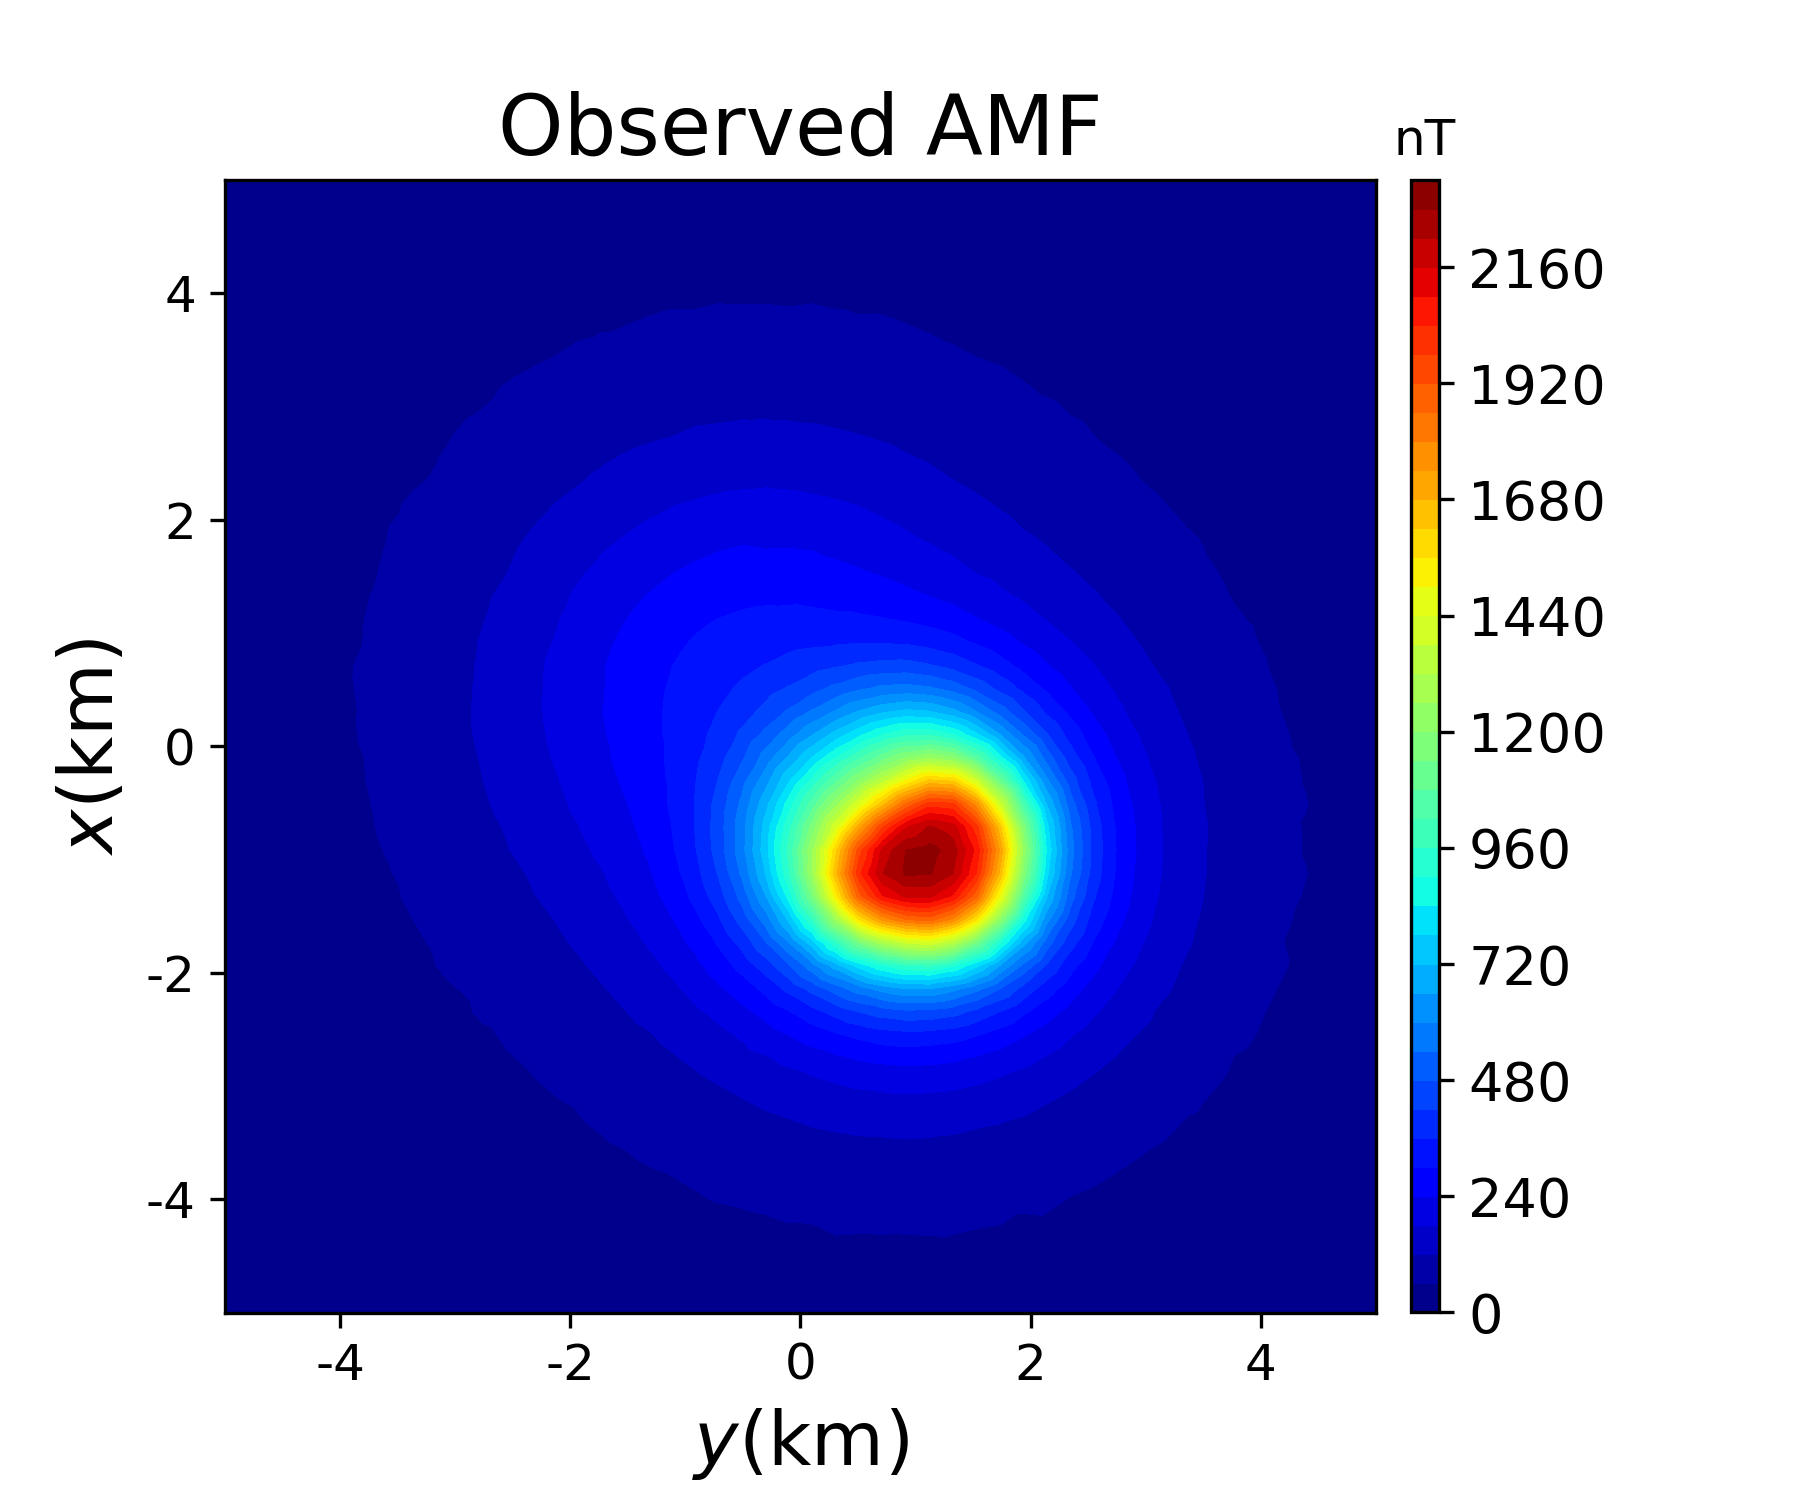

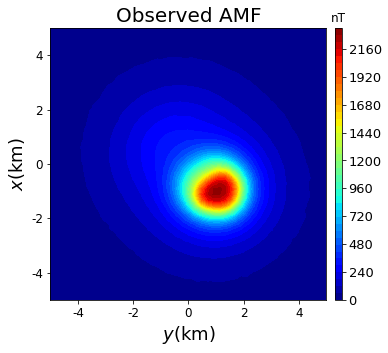

In [41]:
plt.figure(figsize=(6,5))
plt.title('Observed AMF', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], complex_data['amf_obs'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(complex_model['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'/obs_amf.png', dpi=300)
img(filename=mypath+'/obs_amf.png')

### Saving in an outer file

In [42]:
file_name = mypath+'/tfa_data.pickle'
with open(file_name, 'w') as f:
    pickle.dump(complex_data, f)